## Задача 2. Нахождение графической модели определенной структуры по эмпирической ковариационной матрице

### Часть 1. Начальная постановка

1. Хотим: построить взвешенный неориентированный граф, связанный со случайными величинами, в котором вершины соответствуют этим величинам и между ними есть ребро, если величины условно зависимы.
1. Известно, что в общем случае это NP-трудная задача, что связано с ее комбинаторной природой.
1. Для лучшей интерпретируемости связи между данными желательно иметь возможность заранее задавать структуру графа (количество компонент связности, регулярность, разреженность).

В рассмотренной статье решение такой задачи для обширного класса семейств графов сводится к изучению спектральных свойств матрицы Лапласа (Кирхгофа).

### Часть 2. Математическая формулировка

#### Классический метод построения графических моделей (Gaussian Markov Random Field, GMRF)

Пусть $X_1, \dots, X_p$ - реализации случайных величин, $S \in \mathbb{R}^{p \times p}$ - эмпирическая матрица ковариаций. Классический метод построения графических моделей соответствует оцениванию максимального правдоподобия обратной ковариационной матрицы:
$$
\max_{\Theta \in \mathcal{S}_\Theta} \hphantom{ss} \mathrm{log}\det (\Theta) - \mathrm{tr}(\Theta S) - \alpha h(\Theta),
$$
1. $\Theta \in \mathbb{R}^{p \times p}$ - искомая обобщенная матрица Лапласа графа,
1. $\mathcal{S}_\Theta$ - класс $p \times p$ симметричных положительно определенных матриц с нулевыми строчными суммами,
1. $h(\cdot)$ - регуляризационный член.

#### Метод с ограничениями на структуру графа

$$
\max_{\Theta \in \mathcal{S}_\Theta, \lambda(\Theta) \in \mathcal{S}_\lambda} \hphantom{.} \mathrm{log}\hphantom{s} \mathrm{gdet}(\Theta) - \mathrm{tr}(\Theta S) - \alpha h(\Theta),
$$
1. $\mathrm{gdet}(\Theta)$ - обобщенный определитель $\Theta$: произведение ненулевых собственных значений,
1. $\lambda(\Theta)$ - спектр $\Theta$,
1. $\mathcal{S}_\lambda$ - множество, задающее ограничения на спектр.

#### Задание структуры графа

1. $k$ компонент:
$$
\mathcal{S}_\lambda = \left\{ \lambda_j = 0, 1 \le j \le k, 0 < c_1 \le \lambda_{k + 1} \le \dots \le \lambda_p \le c_2 \right\}.
$$
1. Разреженность: правильный выбор $c_1$ и $c_2$.
1. $d$-регулярность: $\forall i$, $\Theta_{ii} = d$.

### Часть 3. Переформулировка в алгебраических терминах

#### Оператор Лапласиана

Линейный оператор $\mathcal{L}: \mathrm{w} \in \mathbb{R}_+^{p(p - 1) / 2} \to \mathcal{L}\mathrm{w} \in \mathcal{S}_\Theta$:
$$
[\mathcal{L}\mathrm{w}]_{ij} = \left\{ \begin{array}{ll}
-\mathrm{w}_{i + d_j}, & i > j, \\
[\mathcal{L}\mathrm{w}]_{ji}, & i < j, \\
-\sum_{i \ne j} [\mathcal{L}\mathrm{w}]_{ij}, & i = j,
\end{array} \right.
$$
где $d_j = -j + \frac{j - 1}{2}(2p - j)$.

Запишем задачу в новых терминах с $\mathcal{l}1$-регуляризацией. После упрощений получим:
$$
\min_{\mathrm{w}, \lambda, U: \mathrm{w} \ge 0, \lambda \in \mathcal{S}_\lambda, U^TU = I} -\mathrm{log} \hphantom{s} \mathrm{gdet}(U\mathrm{Diag}(\lambda)U^T) + \mathrm{tr}(K\mathcal{L}\mathrm{w}) + \frac{\beta}{2} \left\| \mathcal{L}\mathrm{w} - U\mathrm{Diag}(\lambda)U^T \right\|_F^2,
$$
1. $K = S + \alpha(2I - \mathrm{1} \cdot \mathrm{1}^T)$,
1. $\mathcal{L}\mathrm{w} \approx U\mathrm{Diag}(\lambda)U^T$ - спектральное разложение матрицы,
1. $\frac{\beta}{2} \left\| \mathcal{L}\mathrm{w} - U\mathrm{Diag}(\lambda)U^T \right\|_F^2$ - член спектральной регуляризации.

### Часть 4. Метод решения оптимизационной задачи

Будем последовательно итерационно решать задачу для каждого из неизвестных $\mathrm{w}, \lambda, U$ при фиксированных остальных (block successive upper-bound minimization, BSUM).

#### Обновление $\mathrm{w}$ на итерации $t + 1$

Задача
$$
\min_{\mathrm{w} \ge 0} \hphantom{ss} \mathrm{tr}(K\mathcal{L}\mathrm{w}) + \frac{\beta}{2} \left\| \mathcal{L}\mathrm{w} - U\mathrm{Diag}(\lambda)U^T \right\|_F^2
$$
эквивалентна
$$
\min_{\mathrm{w} \ge 0} f(\mathrm{w}) = \frac{1}{2}\left\| \mathcal{L}\mathrm{w}\right\|_F^2 - c^T\mathrm{w},
$$
где $c = \mathcal{L}^*\left( U\mathrm{Diag}(\lambda)U^T - \beta^{-1}K \right)$ с сопряженным оператором $\mathcal{L}^*$.

Функция $f(\mathrm{w})$ мажорируется
$$
g(\mathrm{w}| \mathrm{w}^t) = f(\mathrm{w}^t) + (\mathrm{w} - \mathrm{w}^t)^T \nabla f(\mathrm{w}^t) + \frac{L}{2}\| \mathrm{w} - \mathrm{w}^t \|^2,
$$
1. $\mathrm{w}^t$ - значение на предыдущей итерации,
1. $L = \|\mathcal{L}\|_2^2 = \sup_{\|x\|_F = 1}\| \mathcal{L}x \|_F^2 = 2p$,
1. $\nabla f(\mathrm{w}^t) = \mathcal{L}^*(\mathcal{L}\mathrm{w}^t) - c$.

После сокращений получаем следующую задачу:
$$
\min_{\mathrm{w} \ge 0} \hphantom{ss} \frac{1}{2}\mathrm{w}^T\mathrm{w} - a^T\mathrm{w},
$$
где $a = \mathrm{w}^t - \frac{1}{2p} \nabla f(\mathrm{w}^t)$.

Из условий ККТ находим:
$$
\mathrm{w}^{t + 1} = \left( \mathrm{w}^t - \frac{1}{2p} \nabla f(\mathrm{w}^t) \right)^+, \hphantom{s} где \hphantom{s} a^+ = \max(a, 0).
$$

#### Обновление $U$ на итерации $t + 1$

Решение задачи
$$
\min_{U: U^TU = I} \hphantom{s} \mathrm{tr}\left( U^T\mathcal{L}\mathrm{w}U\mathrm{Diag}(\lambda) \right)
$$
находится из ККТ:
$$
U^{t + 1} = \mathrm{eigvecs}(\mathcal{L}\mathrm{w})[k + 1:p].
$$

#### Обновление $\lambda$ на итерации $t + 1$

Задача
$$
\min_{\lambda: \lambda \in \mathcal{S}_\lambda} \hphantom{s} -\mathrm{log} \hphantom{s} \mathrm{gdet}(\mathrm{Diag}(\lambda)) + \frac{\beta}{2} \left\| U^T\mathcal{L}\mathrm{w}U - \mathrm{Diag}(\lambda) \right\|_F^2,
$$
переписывается в виде
$$
\min_{\begin{array}{ll}
\hphantom{ssss} \lambda: \lambda_j = 0, 1 \le j \le k, \\
\hphantom{.} 0 < c_1 \le \lambda_{k + 1} \le \dots \le \lambda_p \le c_2
\end{array}} -\sum_{i=k+1}^p \mathrm{log}\lambda_i + \frac{\beta}{2} \left\| \lambda - d \right\|_2^2, \hphantom{s} где \hphantom{s} d_i = \left( U^T\mathcal{L}\mathrm{w}U \right)_{ii}.
$$
Это выпуклая задача, решения также находятся из условий ККТ.

#### Утверждение

Последовательность $\left( \mathrm{w}^t, U^t, \lambda^t \right)$ сходится к оптимальному решению переформулированной задачи.

### Часть 5. Эксперименты

#### Реализация метода

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class SGL():
    
    def __init__(self, k=1, alpha=0., lb=0., ub=float('inf')):
        self.k = k
        self.alpha = alpha
        self.lb = lb
        self.ub = ub

    def init_w(self, w0, S_inv):
        if isinstance(w0, str):
            if w0 == 'naive':
                w0 = self.L_inv(S_inv)
                w0[w0 < 0.] = 0.
            elif w0 == 'random':
                w0 = np.random.rand(self.pp) * 10
                w0[w0 < 0.] = 0.
        return w0

    def A(self, w):
        Aw = np.zeros((self.p, self.p))
        Aw[::-1,::-1][np.tril_indices(self.p, -1)] = w[::-1]
        Aw += Aw.T
        return Aw

    def L(self, w):
        Lw = -self.A(w)
        np.fill_diagonal(Lw, -Lw.sum(axis=0))
        return Lw

    def L_inv(self, M):
        return -M[::-1,::-1][np.tril_indices(self.p, -1)][::-1]

    def L_adj(self, M):
        w = np.empty(self.pp)
        for j in range(self.p - 1):
            coeff = self.p * j - (j + 1) * (j + 2) // 2
            for i in range(j + 1, self.p):
                k = i + coeff
                w[k] = M[i, i] - M[i, j] - M[j, i] + M[j, j]
        return w

    def update_w(self, w, Lw, U, lambd, beta):
        c = self.L_adj(U.dot(np.diag(lambd).dot(U.T)) - self.K / beta)
        grad_f = self.L_adj(Lw) - c
        M_grad_f = self.L_adj(self.L(grad_f))
        wT_M_grad_f = (w * M_grad_f).sum()
        dwT_M_dw = (grad_f * M_grad_f).sum()
        # Exact line search
        t = (wT_M_grad_f - (c * grad_f).sum()) / dwT_M_dw
        w_new = w - t * grad_f
        w_new[w_new < 0.] = 0.
        return w_new

    def update_U(self, eigvecs):
        return eigvecs[:, self.k:]

    def update_lambda(self, U, Lw, beta, eps=1e-9):
        d = U.T.dot(Lw.dot(U)).diagonal()
        # Unconstrained solution as initial point
        lambd = .5 * (d + np.sqrt(d**2 + 4. / beta))
        lambd[lambd > self.ub] = self.ub
        lambd[lambd < self.lb] = self.lb
        if np.all(lambd[1:self.q] - lambd[0:self.q - 1] > -eps):
            return lambd
        raise ValueError('Eigenvalues are not in increasing order, consider increasing the value of beta')

    def find_adj(self, S, w0='naive', maxiter=10000, abstol=1e-3, reltol=1e-4,
                 beta=1e4, fix_beta=True, beta_max=float('inf'), rho=1e-2, eigtol=1e-15):
        self.p = S.shape[0]
        self.pp = self.p * (self.p - 1) // 2
        self.q = self.p - self.k
        self.K = S + self.alpha * (2 * np.eye(self.p) - np.ones((self.p, self.p)))
        w = self.init_w(w0, np.linalg.pinv(S, hermitian=True))
        Lw = self.L(w)
        _, eigvecs = np.linalg.eigh(Lw)
        U = self.update_U(eigvecs)
        lambd = self.update_lambda(U, Lw, beta)
        for i in range(maxiter):
            w_new = self.update_w(w, Lw, U, lambd, beta)
            Lw = self.L(w_new)
            eigvals, eigvecs = np.linalg.eigh(Lw)
            U = self.update_U(eigvecs)
            lambd = self.update_lambda(U, Lw, beta)

            absdiff = np.linalg.norm(w_new - w)
            w = w_new
            if absdiff < reltol * np.linalg.norm(w) or \
                    absdiff < abstol:
                break
            if not fix_beta:
                n_zero_eigenvalues = (eigvals < eigtol).sum()
                if n_zero_eigenvalues >= self.k:
                    beta = (1. + rho) * beta
                else:
                    beta = beta / (1. + rho)
                beta = min(beta, beta_max)
        return self.A(w), Lw

#### Пример 1. Классификация полумесяцев

In [3]:
import networkx as nx
from sklearn.datasets import make_moons

In [4]:
n_classes = 100
random_state = 21
X_mn, y_mn = make_moons(n_classes, noise=.07, random_state=random_state)

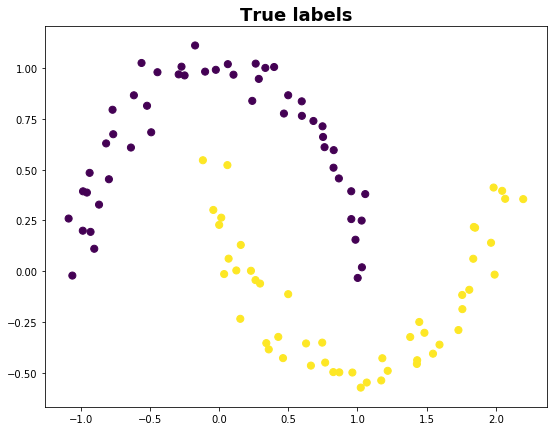

In [5]:
cmap = 'viridis'
dot_size = 50
fig, ax = plt.subplots(figsize=(9, 7))
ax.set_title('True labels', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1], c=y_mn, s=dot_size, cmap=cmap)

In [6]:
X = np.copy(X_mn.T)
X.shape

(2, 100)

In [7]:
emp_cov = X.T.dot(X)
emp_cov.shape

(100, 100)

In [8]:
k = 2
beta = .5

SGL_inst = SGL(k)
A, L = SGL_inst.find_adj(emp_cov, beta=beta)

In [9]:
np.count_nonzero(A) // 2

415

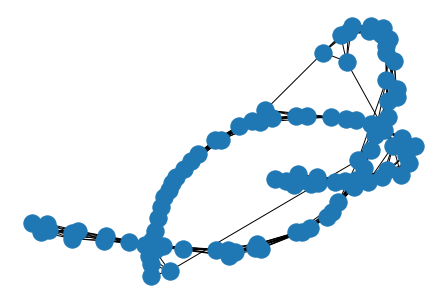

In [10]:
G = nx.from_numpy_matrix(A)
pos = nx.spring_layout(G)
nx.draw(G, layout=pos)
plt.show()

In [11]:
_, eigvecs = np.linalg.eigh(L)

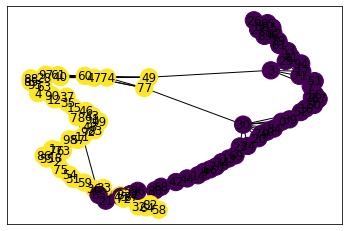

In [12]:
nx.draw_networkx(G, node_color=np.sign(eigvecs[:, 1]))

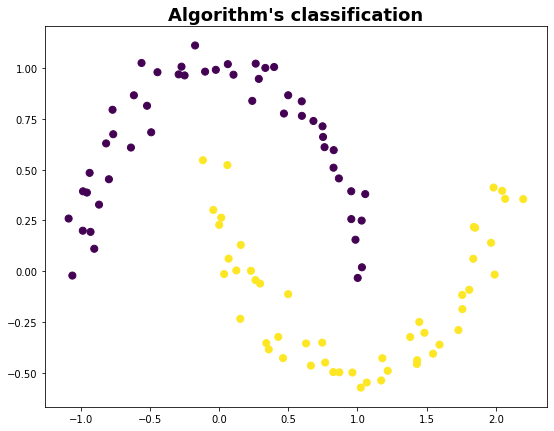

In [13]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Algorithm\'s classification', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1], c=np.sign(eigvecs[:, 1]), s=dot_size, cmap=cmap)

#### Пример 2. Кластеризация животных

In [14]:
import pandas as pd
from sklearn import cluster
import warnings

from graphviz import Graph

In [15]:
def warn(*args, **kwargs):
    pass

warnings.warn = warn

In [16]:
classes = pd.read_csv('data/classes.txt', sep='\t', header=None)
classes.columns = ['id', 'class']
classes = classes['class'].str.replace('+', ' ')
classes = classes.str.capitalize()

classes.head()

0        Antelope
1    Grizzly bear
2    Killer whale
3          Beaver
4       Dalmatian
Name: class, dtype: object

In [17]:
predicates = pd.read_csv('data/predicates.txt', sep='\t', header=None)
predicates.columns = ['id', 'predicate']
predicates = predicates['predicate']

predicates.head()

0    black
1    white
2     blue
3    brown
4     gray
Name: predicate, dtype: object

In [18]:
data = np.loadtxt('data/predicate-matrix-continuous.txt')
n_classes, n_features = data.shape
data.shape

(50, 85)

In [19]:
X = data.copy().T
X.shape

(85, 50)

In [20]:
X -= X.mean(axis=0)

In [21]:
emp_cov = X.T.dot(X) / (n_features - 1)
emp_cov.shape

(50, 50)

In [22]:
k = 12

lb = 1e-2
ub = float('inf')

beta = 1e6
abstol = 1e-4
reltol = 1e-5

SGL_inst = SGL(k, lb=lb, ub=ub)
A, L = SGL_inst.find_adj(emp_cov, abstol=abstol, reltol=reltol, beta=beta, fix_beta=False)

In [23]:
np.count_nonzero(A) // 2

131

In [24]:
G = nx.from_numpy_matrix(A)
components = []
for component in nx.connected_components(G):
    components.append(list(component))

In [25]:
norm = A.sum() / 20
A_norm = A / norm

In [26]:
def draw_graph(classes, components):
    e = Graph(engine='neato')
    e.attr('node', shape='point', color='blue')

    for component in components:
        with e.subgraph() as s:
            for ind in component:
                e.node(classes[ind], xlabel=classes[ind], fontname='times italic')
            for i, ind_1 in enumerate(component):
                for j, ind_2 in enumerate(component[i + 1:]):
                    e.edge(classes[ind_1], classes[ind_2], len='2.45', penwidth=str(A_norm[ind_1, ind_2]))

    for i, comp_1 in enumerate(components):
        for j, comp_2 in enumerate(components[i + 1:]):
            e.edge(classes[list(comp_1)[0]], classes[list(comp_2)[0]], len='2', penwidth='0')

    e.attr(label=r'\n\nAnimals graph')
    e.attr(fontsize='15')

    return e

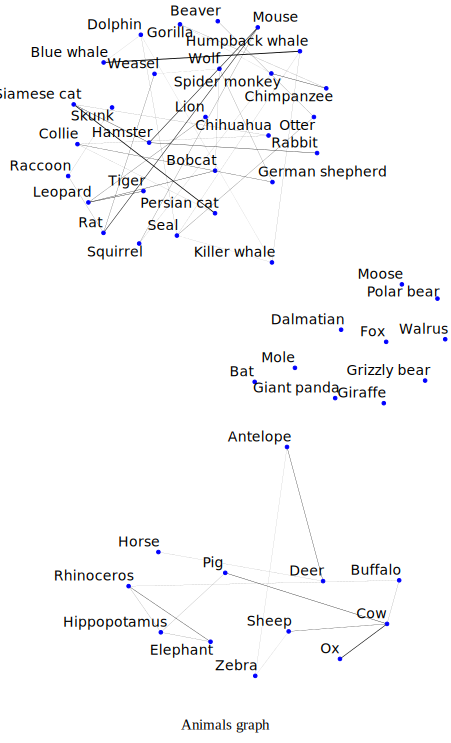

In [27]:
draw_graph(classes, components)

In [28]:
random_seed = 1239
np.random.seed(random_seed)
sc = cluster.SpectralClustering(k, affinity='precomputed', n_init=100)
labels = sc.fit_predict(A) 

In [29]:
n_labels = labels.max()
for i in range(n_labels + 1):
    print(f'Cluster {i + 1}: {", ".join(classes[labels == i])}')

Cluster 1: German shepherd, Wolf, Chihuahua, Collie
Cluster 2: Killer whale, Blue whale, Humpback whale, Dolphin
Cluster 3: Grizzly bear, Dalmatian, Persian cat, Siamese cat, Mole, Moose, Fox, Bat, Giraffe, Giant panda, Polar bear, Walrus
Cluster 4: Spider monkey, Gorilla, Chimpanzee
Cluster 5: Antelope, Horse, Zebra, Deer
Cluster 6: Beaver, Seal, Otter
Cluster 7: Tiger, Leopard, Bobcat, Lion
Cluster 8: Hippopotamus, Elephant, Rhinoceros
Cluster 9: Skunk, Raccoon
Cluster 10: Hamster, Rabbit
Cluster 11: Ox, Sheep, Buffalo, Pig, Cow
Cluster 12: Squirrel, Rat, Weasel, Mouse


### Резюме

Рассмотренный метод позволяет быстро, легко и содержательно анализировать структуры зависимостей в данных, выделяя в них ключевые связи.

### Литература:

1. Sandeep Kumar, Jiaxi Ying, Jose Vinıcius de M. Cardoso and Daniel P. Palomar (2019) Structured Graph Learning via Laplacian SpectralConstraints, NeurIPS 2019 Reproducibility Challenge.

<h1><center>Thank you!</center></h1>